<a href="https://colab.research.google.com/github/Sinha532/ChatBotApp/blob/main/_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on Web Scraping reviews and Performing Sentiment Analysis using BERT

**Importing Necessary Libraries**

BeautifulSoup: For Parsing the html page

requests: For requesting html code from web

pandas: to create the dataframe

In [56]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re


dataset(): performs to extract username, title and review
returns a dataframe in the last

In [57]:
def dataset(soup):
  titles=[]
  users=[]
  reviews=[]

  li_elements=soup.find_all('li',class_="parent_review li_parent_0")
  for li_element in li_elements:

    title= li_element.find('div',class_="_flx _cmttl")
    if title:
      titles.append(title.get_text(strip=True))

    i=li_element.find('div',class_="_cmtname")
    if i:
      text=i.get_text(strip=True)

      name_pattern = r'^(.*?)\('
      match = re.search(name_pattern,text)

      if match:
        name=match.group(1)
        users.append(name)
      else:
        users.append("unknown")

    review=li_element.find('div',class_="_cmttxt _wwrap")
    if review:
      reviews.append(review.get_text(strip=True))

  df={
      "Title":titles,
      "Users":users,
      "Reviews":reviews
  }

  data=pd.DataFrame(df)

  return data

 Passing the *url* to **requests.get()** to get the html elements page

 we pass the *headers* to To specify the accept content

 when the *response is 200* we pass the html text content to **BeautifulSoup()** to start parsing

In [58]:
url="https://www.gadgets360.com/apple-iphone-7-3766/user-reviews"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')
    data=dataset(soup)

else:

  print("No Data Found")

#Loading the Dataset

In [59]:
data.head(5)

,Title,Users,Reviews
0,OTG support,Sanky Shilkollu,Does iphone 7 and 7 plus have OTG support
1,iPhone 7 review,Jaya,So excited for the product... apple is truly a...
2,Good mobile,Gyanendra Kumar,Good mobile
3,Good product,Gyanendra Kumar,Good product
4,Battery of iPhone 7,SHAIK WASIM AKRAM,Pls confirm me the screen time one full charge...


#BERT MODEL
for Sentiment Analysis of Reviews on Apple Iphone 7

BertTokenizer.from_pretrained():used for tokenizing and preprocessing text using Hugging Face transformer "bert-base-uncased"

BertForSequenceClassification: takes a sequence of text as input and outputs a probability distribution over a set of labels. The labels can be any categorical class, such as positive or negative sentiment.

In [60]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT is a transformer-based model, and transformers are notoriously difficult to train and deploy.

Torch provides a number of features that make it easier to train and deploy transformer models.

"Sentiment": It is new column to store the sentiment analysis of the "Reviews"





In [62]:
import torch
data["Sentiment"]='  '

for index,row in data.iterrows():
  input_text=data['Reviews'][index]
  inputs=tokenizer(input_text, return_tensors="pt",truncation=True, padding=True)

  with torch.no_grad():
    outputs=model(**inputs)
    logits=outputs.logits

  probs= torch.softmax(logits,dim=1)
  predict_class= torch.argmax(probs,dim=1).item()

  sentiment="positive" if predict_class ==0 else "negative"

  data.at[index,'Sentiment']=sentiment


tokenizer(): takes sequence of text as input and outputs Probability Distribution

input_text: text need to be tokenized and preprocessed

return_tensors: return tokenized text in the form of PyTorch Tensors

Truncation='True': Tells the input_text  to stop if it exceeds the max token limit

Padding='True': add padding tokens to the input if it is shorter then the max token length


In [63]:
for index,row in data.iterrows():
  input_text=data['Reviews'][index]
  inputs=tokenizer(input_text, return_tensors="pt",truncation=True, padding=True)

no_grad(): It optimize the performance as we are not training the model although using pre-trained model , so there is need not to update the parameters

inputs: this is a dictionary containing tokenized and preprocessed text in the form of keyword arguments.


**inputs: pass the inputs as keyword arguments to the model.

In [64]:
with torch.no_grad():
  outputs=model(**inputs)
  logits=outputs.logits

print(inputs)

{'input_ids': tensor([[ 101, 2190, 2412, 1999, 3504,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


softmax():The softmax operation transforms the logits into a probability distribution over classes. It exponentiates each element in the tensor and then normalizes the results.

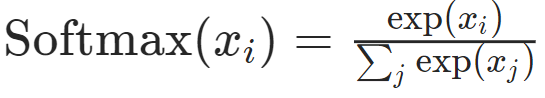






In [65]:
  probs= torch.softmax(logits,dim=1)
  predict_class= torch.argmax(probs,dim=1).item()

In [66]:
print(data.head())

                 Title              Users  \
0          OTG support    Sanky Shilkollu   
1      iPhone 7 review               Jaya   
2          Good mobile    Gyanendra Kumar   
3         Good product    Gyanendra Kumar   
4  Battery of iPhone 7  SHAIK WASIM AKRAM   

                                             Reviews Sentiment  
0          Does iphone 7 and 7 plus have OTG support  positive  
1  So excited for the product... apple is truly a...  positive  
2                                        Good mobile  positive  
3                                       Good product  positive  
4  Pls confirm me the screen time one full charge...  positive  
